<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Nombres Apellidos  <br>
Fecha: DD/MM/2022

# Importación de librerias necesarias

In [ ]:
#Para esta actividad se importarán las siguientes librerías:
import cv2
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import shutil
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from  PIL  import Image
from rembg import remove
from sklearn.preprocessing import MinMaxScaler
import h5py
from time import sleep
from sklearn.model_selection import train_test_split
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Cargar el Dataset

In [2]:
#Procedemos a cargar las imagenes para lo cual especificamos el nombre del archivo
images_path = "./proyectoIA"
#images_path = "/Users/johan/Downloads/principal/proyectoIA"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['ArroboMercy', 'EnriquezSelena', 'Jhon Zambrano', 'LeonardoBorja', 'SalazarJohana']


## Descripción de la fuente

    Las imagenes se encuantran en una carpeta denominada "proyectoIA",se procede a cargar  imagenes de caracteristicas distintas. Dichas imagenes sera utilizados entrenar el modelo que permita la autenticacion del ususario por medio de un aplicativo.En el cual las imagenes seran entrenadas para la dicha autenticacion.

## Explique el problema a resolver. 

En el siguiente trabajo usamos imagenes que van a ser entrenadas por medio de un algoritmo supervisado. Para lograr esto se crea etiquetas con valores, esa información entrada y salida esperada. La red al entrenar ajustará los pesos de las Neuronas. La red a utilizar es Convolutional Neural Network, por ello necesitamos la libreria keras y tensorflow.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Vamos a trabajar con un total de 3 imagenes por cada estudiante en este caso son 5 personas, dichas imagenes esen en formato png por lo tanto esoecificamos en la ruta. El tamaño que se maneja en las imagenes es de carnet americano. Aunque no tiene todas las mismas medidas con el preproceso se resuelve el problema.

In [ ]:
#Especificamos la carpeta donde se va a proceder a realizar el aumento
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    elements = os.listdir(cur_path)
    
    for element in elements:
        print("Copying Image - {} in proyectoIA_aument/{}".format(element, class_name))
        src = os.path.join(images_path + "/" + class_name, element) # origen
        dst = os.path.join("./proyectoIA_aument/" + class_name, element) 
        shutil.copy(src, dst)

In [4]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

In [5]:

#Creando imagnes aumentadas para la carpeta de Mercy Arrobo
os.chdir(r"\Users\johan\Downloads\proyectoIA_aument\ArroboMercy")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'ArroboMercy ', 
            save_format='png'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [6]:

#Creando imagnes aumentadas para la carpeta de Johana Salazar
os.chdir(r"\Users\johan\Downloads\proyectoIA_aument\SalazarJohana")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'SalazarJohana', 
            save_format='png'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [7]:

#Creando imagnes aumentadas para la carpeta deEnriquez Selena
os.chdir(r"\Users\johan\Downloads\proyectoIA_aument\EnriquezSelena")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'EnriquezSelena', 
            save_format='png'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [8]:

#Creando imagnes aumentadas para la carpeta de John Zambrano
os.chdir(r"\Users\johan\Downloads\proyectoIA_aument\Jhon Zambrano")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Jhon Zambrano', 
            save_format='png'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [9]:

#Creando imagnes aumentadas para la carpeta de Leonardo Borja
os.chdir(r"\Users\johan\Downloads\proyectoIA_aument\LeonardoBorja")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'LeonardoBorja', 
            save_format='png'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  


## NLM Filter for image denoising

In [10]:
#Procedemos a la eliminacion del ruido de las imagenes en cada una de las carpetas de acada persona
#os.chdir(r"/Users/johan/Downloads/")
os.chdir(r"/Users/johan/Downloads/")
images_path = "./proyectoIA_aument"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['ArroboMercy', 'EnriquezSelena', 'Jhon Zambrano', 'LeonardoBorja', 'SalazarJohana']


In [11]:
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # denoising images
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])
        # save images
        save_path = './proyectoIA_deniod/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        

        # show loop update
        i += 1

Processing Image - 1 in ArroboMercy
Processing Image - 2 in ArroboMercy
Processing Image - 3 in ArroboMercy
Processing Image - 4 in ArroboMercy
Processing Image - 5 in ArroboMercy
Processing Image - 6 in ArroboMercy
Processing Image - 7 in ArroboMercy
Processing Image - 8 in ArroboMercy
Processing Image - 9 in ArroboMercy
Processing Image - 10 in ArroboMercy
Processing Image - 11 in ArroboMercy
Processing Image - 12 in ArroboMercy
Processing Image - 13 in ArroboMercy
Processing Image - 14 in ArroboMercy
Processing Image - 15 in ArroboMercy
Processing Image - 16 in ArroboMercy
Processing Image - 17 in ArroboMercy
Processing Image - 18 in ArroboMercy
Processing Image - 19 in ArroboMercy
Processing Image - 20 in ArroboMercy
Processing Image - 21 in ArroboMercy
Processing Image - 22 in ArroboMercy
Processing Image - 23 in ArroboMercy
Processing Image - 24 in ArroboMercy
Processing Image - 25 in ArroboMercy
Processing Image - 26 in ArroboMercy
Processing Image - 27 in ArroboMercy
Processing

## Background Removal

In [12]:
images_path = "./proyectoIA_deniod"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['ArroboMercy', 'EnriquezSelena', 'Jhon Zambrano', 'LeonardoBorja', 'SalazarJohana']


In [13]:
#Procedemos a eliminar el fondo de todas las imagenes a las
#cuales se les elimino el ruido. Dichas imagenes se guardaran en la carpeta proyectoIA_rgb
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # remove bg 
        output = remove(image)
        # save images ruta de la carpeta
        save_path = './proyectoIA_rgb/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'), output)
        

        # show loop update
        i += 1

Processing Image - 1 in ArroboMercy
Processing Image - 2 in ArroboMercy
Processing Image - 3 in ArroboMercy
Processing Image - 4 in ArroboMercy
Processing Image - 5 in ArroboMercy
Processing Image - 6 in ArroboMercy
Processing Image - 7 in ArroboMercy
Processing Image - 8 in ArroboMercy
Processing Image - 9 in ArroboMercy
Processing Image - 10 in ArroboMercy
Processing Image - 11 in ArroboMercy
Processing Image - 12 in ArroboMercy
Processing Image - 13 in ArroboMercy
Processing Image - 14 in ArroboMercy
Processing Image - 15 in ArroboMercy
Processing Image - 16 in ArroboMercy
Processing Image - 17 in ArroboMercy
Processing Image - 18 in ArroboMercy
Processing Image - 19 in ArroboMercy
Processing Image - 20 in ArroboMercy
Processing Image - 21 in ArroboMercy
Processing Image - 22 in ArroboMercy
Processing Image - 23 in ArroboMercy
Processing Image - 24 in ArroboMercy
Processing Image - 25 in ArroboMercy
Processing Image - 26 in ArroboMercy
Processing Image - 27 in ArroboMercy
Processing

Data loading and exploration

In [15]:
fpath = './proyectoIA_rgb'
random_seed = 9

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['ArroboMercy', 'EnriquezSelena', 'Jhon Zambrano', 'LeonardoBorja', 'SalazarJohana'] 

No. of categories =  5


In [16]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            img_lst.append(np.array(img_array))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  153 
No. of labels loaded =  153
<class 'list'> <class 'list'>


In [17]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (153,) 
Labels shape =  (153,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


C:\Users\johan\AppData\Local\Temp\ipykernel_6444\464512149.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


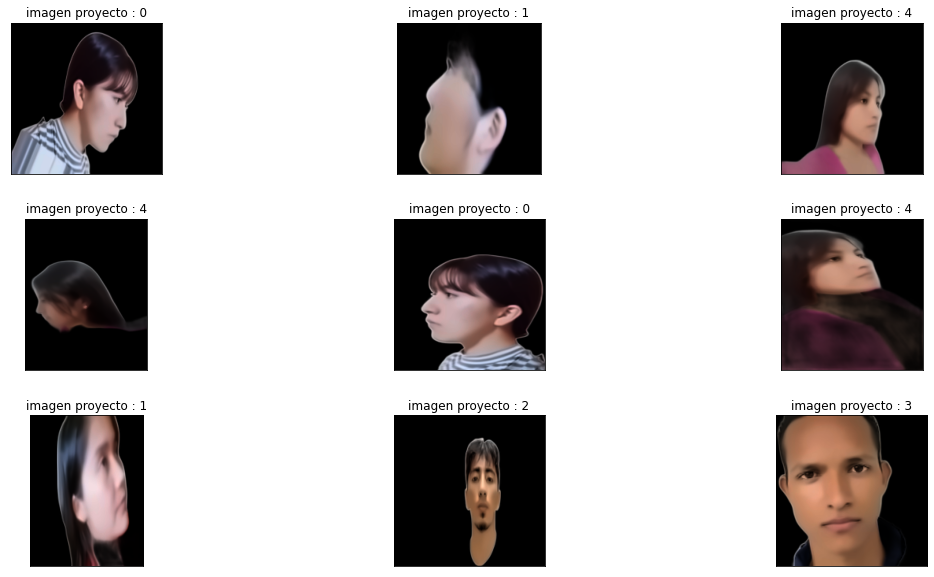

In [18]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('imagen proyecto : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)